In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



%matplotlib inline

In [55]:
data = pd.read_csv('kc_house_data.csv')

In [99]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,current_sqft_lot,current_sqft_living
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,160
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,397,-880
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062,-1938,1950
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,-600
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,-577,120
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,4760,101930,0,-660
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,98003,2238,6819,0,523
7,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1060,0.0,1963,0.0,98198,1650,9711,0,590
8,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,0.0,98146,1780,8113,643,0
9,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,0.0,98038,2390,7570,1010,500


In [57]:
data.shape

(21597, 21)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [59]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [60]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [61]:
data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [62]:
data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [63]:
data.waterfront.unique()

array([nan,  0.,  1.])

In [64]:
#df of lat, long, and waterfront columns
#tried to install geopandas unsuccessfully - wanted to plot the lat/long so could accurately fill NaN values
#in waterfront
lat_long_water = data.loc[:, ['long', 'lat', 'waterfront']]
lat_long_water

,long,lat,waterfront
0,-122.257,47.5112,NaN
1,-122.319,47.7210,0.0
2,-122.233,47.7379,0.0
3,-122.393,47.5208,0.0
4,-122.045,47.6168,0.0
...,...,...,...
21592,-122.346,47.6993,0.0
21593,-122.362,47.5107,0.0
21594,-122.299,47.5944,0.0
21595,-122.069,47.5345,NaN


In [65]:
#df with only NaN values from lat_long_water df
is_NaN = lat_long_water.isnull()

row_has_NaN = is_NaN.any(axis=1)

rows_with_NaN = lat_long_water[row_has_NaN]


print(rows_with_NaN)

          long      lat  waterfront
0     -122.257  47.5112         NaN
10    -122.145  47.6007         NaN
23    -122.166  47.3533         NaN
40    -122.027  47.6145         NaN
55    -122.290  47.6597         NaN
...        ...      ...         ...
21578 -122.107  47.3749         NaN
21582 -122.264  47.2931         NaN
21586 -122.002  47.3095         NaN
21587 -121.881  47.5389         NaN
21595 -122.069  47.5345         NaN

[2376 rows x 3 columns]


In [66]:
#df of yr_built and yr_renovated columns
years = data.loc[:,['yr_built', 'yr_renovated']]
years

,yr_built,yr_renovated
0,1955,0.0
1,1951,1991.0
2,1933,NaN
3,1965,0.0
4,1987,0.0
...,...,...
21592,2009,0.0
21593,2014,0.0
21594,2009,0.0
21595,2004,0.0


In [67]:
#df with only NaN values from years df
yrs_is_NaN = years.isnull()

yrRow_has_NaN = yrs_is_NaN.any(axis=1)

yrRows_with_NaN = years[yrRow_has_NaN]


print(yrRows_with_NaN)

       yr_built  yr_renovated
2          1933           NaN
12         1927           NaN
23         1985           NaN
26         1915           NaN
28         1948           NaN
...         ...           ...
21576      2008           NaN
21577      2006           NaN
21579      2006           NaN
21581      2007           NaN
21583      2003           NaN

[3842 rows x 2 columns]


In [68]:
data.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [69]:
#fill NaN values in view and waterfront columns with 0
#for waterfront, 0 means no waterfront view
#for view, 0 means the house has not been viewed
values = {'view':0, 'waterfront':0}
data.fillna(value=values, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [70]:
data.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

# Residential Building Grades 
__Grades 1 -3__ Falls short of minimum building standards. Normally cabin or inferior structure.<br> 
__Grade 4__ Generally older low quality construction. Does not meet code.<br>
__Grade 5__ Lower construction costs and workmanship. Small, simple design.<br>
__Grade 6__ Lowest grade currently meeting building codes. Low quality materials, simple designs.<br>
__Grade 7__ Average grade of construction and design. Commonly seen in plats and older subdivisions.<br> 
__Grade 8__ Just above average in construction and design. Usually better materials in both the exterior and interior finishes.<br> 
__Grade 9__ Better architectural design, with extra exterior and interior design and quality.<br>
__Grade 10__ Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.<br>
__Grade 11__ Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.<br>
__Grade 12__ Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.<br>
__Grade 13__ Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries<br>


https://rstudio-pubs-static.s3.amazonaws.com/365141_557e3a80cf564e1bb2bc18dc1320692e.html

## Column Descriptions
id - a notation for the house; a numeric data type<br>
date - date the house was sold; string<br>
price - Price of the house; numeric<br>
bedrooms - no.of bedrooms in a house; numeric<br>
bathrooms - no. of bathrooms; numeric<br>
sqft_living - square footage of the home; numeric<br>
sqft_lot - square footage of the lot; numeric<br>
floors - no.of floors in the house; numeric<br>
waterfront - House which has a view to a waterfront; numeric<br>
view - has been viewed; numeric<br>
condition - how good is the condition; numeric<br>
grade - overall grade given to the housing unit, based on King County grading system; numeric<br>
sqft_above - square footage of house apart from basement; numeric<br>
sqft_basement - square footage of the basement; numeric<br>
yr_built - built year; numeric<br>
yr_renovated - year when house was renovated; numeric<br>
zipcode - zip; numeric<br>
lat - latitiude; numeric<br>
long - longitude; numeric<br>
sqft_living15 - Living room area in 2015(implies– some renovations). This might or might not have affected the lot size area; numeric<bnr>
sqft_lot15 - lot Size area in 2015(implies– some renovations); numeric
























The following columns are believed to be negligible in their effect for influencing the sale price of a home and were subsequently dropped:<br>
__id, date, view, lat, long__ 

In [71]:
data.drop(columns = ['id','date','view','lat','long'], inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287


In [72]:
#create new column for the current square feet of lot based on the difference between sqft_lot and 
#sqft_lot15 columns - if different, implies renovation
data['current_sqft_lot'] = data['sqft_lot15'] - data['sqft_lot']
data.current_sqft_lot

0           0
1         397
2       -1938
3           0
4        -577
         ... 
21592     378
21593    1387
21594     657
21595   -1101
21596     281
Name: current_sqft_lot, Length: 21597, dtype: int64

In [73]:
#create new column for the current square feet of living space based on the difference between sqft_living 
#and sqft_living15 columns - if different, implies renovation
data["current_sqft_living"] = data['sqft_living15'] - data['sqft_living']
data.current_sqft_living

0         160
1        -880
2        1950
3        -600
4         120
         ... 
21592       0
21593    -480
21594       0
21595    -190
21596       0
Name: current_sqft_living, Length: 21597, dtype: int64

In [74]:
#counts for whether sqft_living changed
changes_liv = data['current_sqft_living'] != 0
changes_liv.value_counts()

True     19034
False     2563
Name: current_sqft_living, dtype: int64

In [75]:
#counts for whether sqft_lot changed
changes = data['current_sqft_lot'] != 0
changes.value_counts()

True     17123
False     4474
Name: current_sqft_lot, dtype: int64

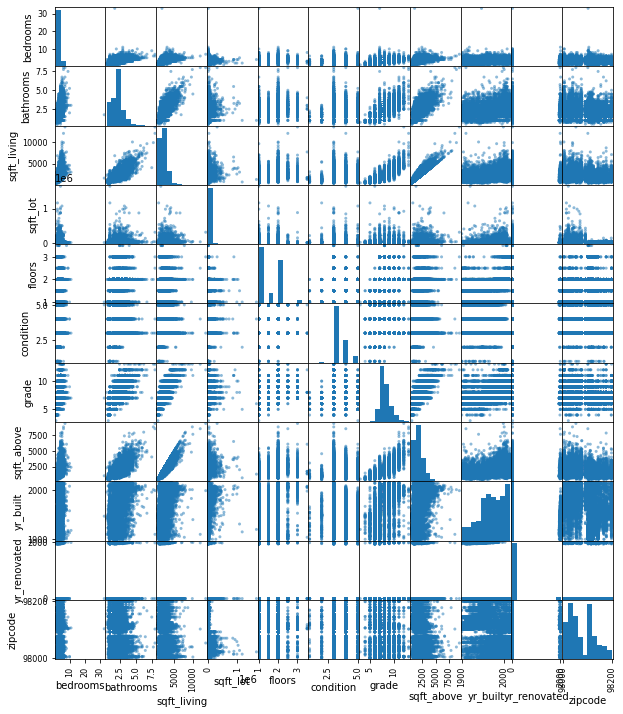

In [76]:
#scatter matrix for data, took out price (target), left out sqft_basement, yr_built, yr_renovated, 
#waterfront, sqft_living15, & sqft_lot15
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode']
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

basement_sqft could be changed to boolean as to whether present or not

## From examining the scatter matrix:
### The following pairs of predictors appear to be linear:
sqft_living and sqft_above<br>
__possibly__ sqft_living and bathrooms<br>
__possibly__ sqft_above and bathrooms<br>
__possibly__ grade and sqft_above<br>
__possibly__ grade and sqft_living<br>
__possibly__ grade and bathrooms<br>
### The following predictors appear to be categorical:
floors, condition, grade
### Grade looks to be the only predictor with a normal distribution although bathrooms and sqft_above look right skewed normalish


In [121]:
#df to look for collinearity
data_pred = data.iloc[:,[1,2,3,4,9,10,11,13]]
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode
0,3,1.00,1180,5650,1180,0.0,1955,98178
1,3,2.25,2570,7242,2170,400.0,1951,98125
2,2,1.00,770,10000,770,0.0,1933,98028
3,4,3.00,1960,5000,1050,910.0,1965,98136
4,3,2.00,1680,8080,1680,0.0,1987,98074


In [123]:
#collinearity matrix
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode
bedrooms,1.000000,0.514508,0.578212,0.032471,0.479386,0.297229,0.155670,-0.154092
bathrooms,0.514508,1.000000,0.755758,0.088373,0.686668,0.278485,0.507173,-0.204786
sqft_living,0.578212,0.755758,1.000000,0.173453,0.876448,0.428660,0.318152,-0.199802
sqft_lot,0.032471,0.088373,0.173453,1.000000,0.184139,0.015031,0.052946,-0.129586
sqft_above,0.479386,0.686668,0.876448,0.184139,1.000000,-0.051175,0.424037,-0.261570
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.051175,1.000000,-0.130085,0.073271
yr_built,0.155670,0.507173,0.318152,0.052946,0.424037,-0.130085,1.000000,-0.347210
zipcode,-0.154092,-0.204786,-0.199802,-0.129586,-0.261570,0.073271,-0.347210,1.000000


In [125]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode
bedrooms,True,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False
sqft_living,False,True,True,False,True,False,False,False
sqft_lot,False,False,False,True,False,False,False,False
sqft_above,False,False,True,False,True,False,False,False
sqft_basement,False,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,True,False
zipcode,False,False,False,False,False,False,False,True


In [126]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [128]:
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(bathrooms, sqft_living)",0.755758


## Examination of the correlation matrix of continuous variables
Two pairs of continuous variables were found to have a high correlation implying collinearity:
1. sqft_living and sqft_above
2. bathrooms and sqft_living

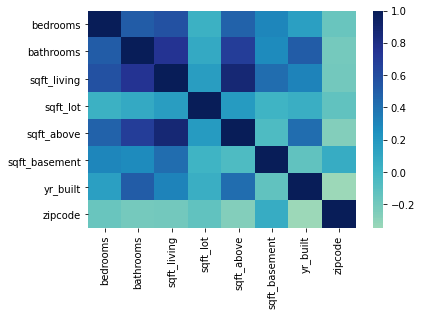

In [134]:
import seaborn as sns
sns.heatmap(data_pred.corr(), cmap="YlGnBu", center=0);

In [77]:
data.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [132]:
#statsmodels regression model with unchanged predictors from scatter matrix 
outcome1 = 'price'
x_cols1 = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 
          'sqft_basement','sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']
predictors1 = '+'.join(x_cols1)
formula1 = outcome1 + '~' + predictors1
model = ols(formula=formula1, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2653.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:13:08   Log-Likelihood:            -2.9610e+05
No. Observations:               21597   AIC:                         5.922e+05
Df Residuals:                   21581   BIC:                         5.924e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.462e+05   3.14e+06      0.302      0.763    -5.2e+06     7.1e+06
bedrooms      -4.236e+04   2050.878    -20.653      0.000   -4.64e+04   -3.83e+04
bathrooms      4.751e+04   3530.530     13.456      0.000    4.06e+04    5.44e+04
sqft_living     124.7903     19.558      6.380      0.000      86.455     163.126
sqft_lot          0.0305      0.052      0.590      0.555      -0.071       0.132
floors         2.875e+04   3872.147      7.424      0.000    2.12e+04    3.63e+04
waterfront     7.472e+05   1.83e+04     40.738      0.000    7.11e+05    7.83e+05
condition      2.108e+04   2536.779      8.309      0.000    1.61e+04    2.61e+04
grade          1.241e+05   2275.562     54.545      0.000     1.2e+05    1.29e+05
sqft_basement    56.1361     19.388      2.895      0.004      18.135      94.137
sqft_above       34.4668     19.532      1.765      0.078      -3.817      72.750
yr_built      -3705.8517     74.200    -49.944      0.000   -3851.288   -3560.415
yr_renovated     16.3200      4.300      3.795      0.000       7.892      24.748
zipcode          55.7627     31.487      1.771      0.077      -5.953     117.479
sqft_living15    34.9603      3.644      9.594      0.000      27.817      42.103
sqft_lot15       -0.5549      0.079     -7.013      0.000      -0.710      -0.400
==============================================================================
Omnibus:                    16303.285   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1138522.609
Skew:                           3.041   Prob(JB):                         0.00
Kurtosis:                      38.046   Cond. No.                     2.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## First regression model with no changes to original data
1. R-squared value of 0.648, noteably the adjusted R-squared value is the same as R-Squared<br>
This translates to the predictors accounting for 64.8% of the variance seen in the target.
2. Intercept has high p-value and its confidence level spans 0
3. The sqft_lot predictor has high p-value and its confidence level spans 0
4. The sqft_above predictor has a high p-value and its confidence level spans 0
5. The zipcode predictor has a high p-value and its confidence level spans 0

In [133]:
#regression model with unchanged predictors from scatter matrix but categorical values omitted 
outcome2 = 'price'
x_cols2 = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'sqft_basement', 'floors', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode']
predictors2 = '+'.join(x_cols2)
formula2 = outcome2 + '~' + predictors2
model2 = ols(formula=formula2, data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2923.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:18:29   Log-Likelihood:            -2.9697e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21584   BIC:                         5.941e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.724e+06   3.22e+06      0.535      0.593    -4.6e+06    8.04e+06
bedrooms      -4.842e+04   2125.649    -22.779      0.000   -5.26e+04   -4.43e+04
bathrooms      4.741e+04   3671.223     12.915      0.000    4.02e+04    5.46e+04
sqft_living     135.9207     20.339      6.683      0.000      96.055     175.786
sqft_lot         -0.2227      0.038     -5.786      0.000      -0.298      -0.147
sqft_basement    67.7346     20.174      3.357      0.001      28.192     107.277
floors          2.68e+04   3995.128      6.709      0.000     1.9e+04    3.46e+04
condition      2.155e+04   2637.962      8.170      0.000    1.64e+04    2.67e+04
grade          1.323e+05   2259.309     58.568      0.000    1.28e+05    1.37e+05
sqft_above       45.8732     20.303      2.259      0.024       6.077      85.669
yr_built      -3811.2877     77.145    -49.404      0.000   -3962.498   -3660.077
yr_renovated     24.1490      4.465      5.408      0.000      15.396      32.901
zipcode          49.7801     32.340      1.539      0.124     -13.608     113.168
==============================================================================
Omnibus:                    17314.220   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1212262.469
Skew:                           3.356   Prob(JB):                         0.00
Kurtosis:                      39.085   Cond. No.                     2.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Second regression model with categorical predictors eliminated
1. Compared to the first model, the R-squared value decreased.
2. The R-squared for this rudimentary model is 0.618 which means these predictors account for 61.8% of the variance seen in the target. Notably, the Adjusted R-squared and the R-squared continue to be the same at this point.
3. Most of the predictors have a p-value < 0.05.
4. The zipcode predictor continues to have a high p_value and a confidence level spanning 0
5. The intercept continues to have an unacceptably high p-value = 0.906 - which increased compared to the first model - as well as a confidence level that spans 0

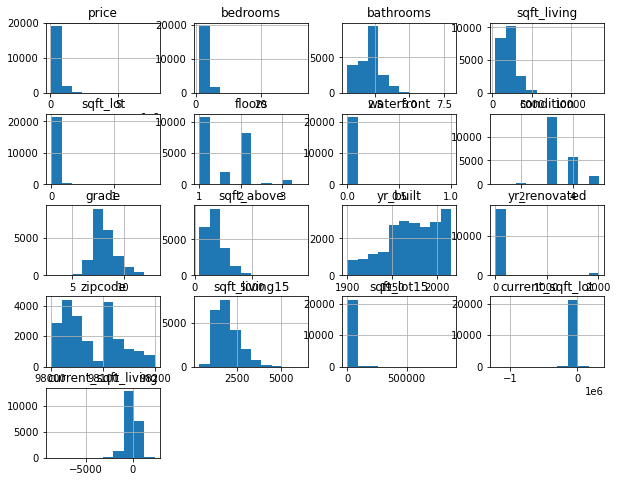

In [79]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
data.hist(ax = ax);

In [98]:
data.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [102]:
#change the value ? to string 0
data['sqft_basement'] = data['sqft_basement'].replace(['?'],'0')

#convert datatype of sqft_basement column to float
data = data.astype({'sqft_basement': float})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   bedrooms             21597 non-null  int64  
 2   bathrooms            21597 non-null  float64
 3   sqft_living          21597 non-null  int64  
 4   sqft_lot             21597 non-null  int64  
 5   floors               21597 non-null  float64
 6   waterfront           21597 non-null  float64
 7   condition            21597 non-null  int64  
 8   grade                21597 non-null  int64  
 9   sqft_above           21597 non-null  int64  
 10  sqft_basement        21597 non-null  float64
 11  yr_built             21597 non-null  int64  
 12  yr_renovated         17755 non-null  float64
 13  zipcode              21597 non-null  int64  
 14  sqft_living15        21597 non-null  int64  
 15  sqft_lot15           21597 non-null 

In [104]:
#create boolean column for whether a property has a basement
data['has_base'] = np.where((data['sqft_basement'] > 0),1,0)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,current_sqft_lot,current_sqft_living,has_base
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,160,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,397,-880,1
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062,-1938,1950,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,-600,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,-577,120,0


In [110]:
#fill NaN values in yr_renovated column with 0
data['yr_renovated'].fillna(0, inplace=True)
data['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [111]:
#create boolean column for whether a property has been renovated
data['has_renov'] = np.where((data['yr_renovated'] > 0),1,0)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,current_sqft_lot,current_sqft_living,has_base,has_renov
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,160,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,397,-880,1,1
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,-1938,1950,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,-600,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,-577,120,0,0


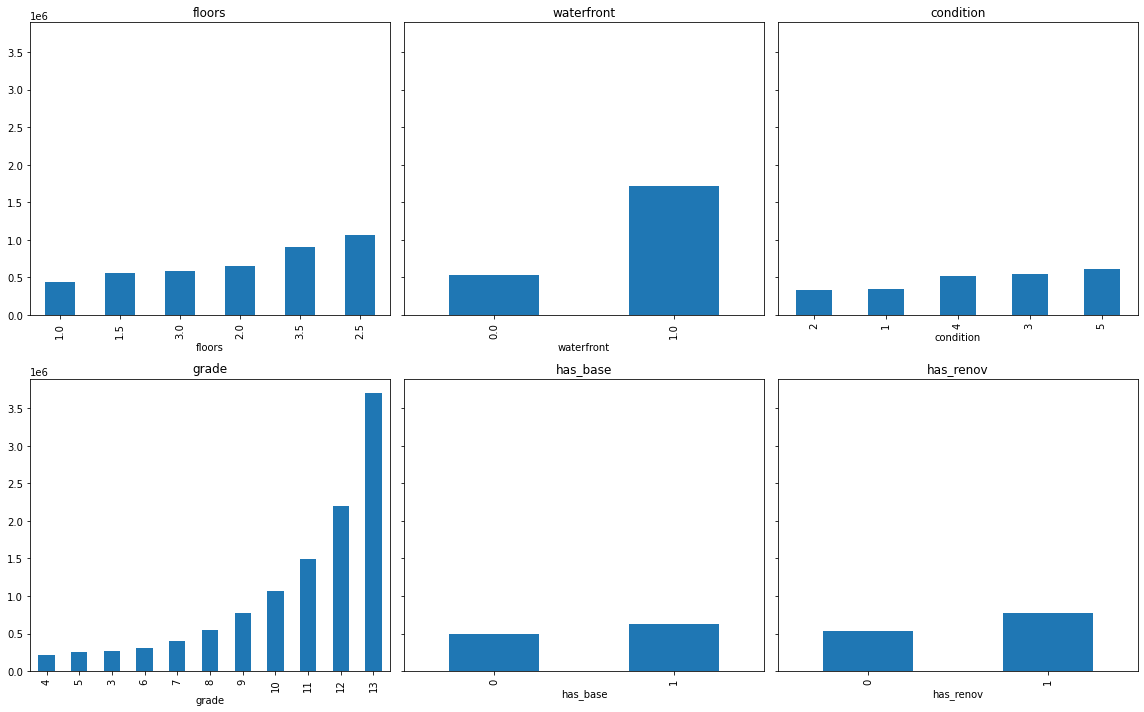

In [114]:
#create bar plots of categoricals
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)
categoricals = ['floors', 'waterfront', 'condition', 'grade', 'has_base', 'has_renov']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)
        .mean()['price']
        .sort_values()
        .plot
        .bar(ax=ax))
    ax.set_title(col)
    
fig.tight_layout();


In [118]:
#create dummy variables for categoricals
categoricals = ['floors', 'waterfront', 'condition', 'grade', 'has_base', 'has_renov']
dummies = pd.get_dummies(data[categoricals], prefix='cats', drop_first=True)
dummies
#didn't work beacuse dummy values cannot be numerical

,floors,waterfront,condition,grade,has_base,has_renov
0,1.0,0.0,3,7,0,0
1,2.0,0.0,3,7,1,1
2,1.0,0.0,3,6,0,0
3,1.0,0.0,5,7,1,0
4,1.0,0.0,3,8,0,0
...,...,...,...,...,...,...
21592,3.0,0.0,3,8,0,0
21593,2.0,0.0,3,8,0,0
21594,2.0,0.0,3,7,0,0
21595,2.0,0.0,3,8,0,0
